In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
iris=load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df["target"]=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
df[df.target==0].head()
df[df.target==1].head()
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [14]:
df["flower_names"]=df.target.apply(lambda x: iris.target_names[x])

In [15]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [16]:
df["flower_names"].value_counts()

versicolor    50
setosa        50
virginica     50
Name: flower_names, dtype: int64

In [17]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

No handles with labels found to put in legend.


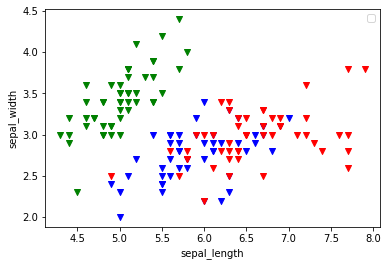

In [19]:
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")

plt.scatter(df0["sepal length (cm)"],df0["sepal width (cm)"],color="green",marker="v")
plt.scatter(df1["sepal length (cm)"],df1["sepal width (cm)"],color="blue",marker="v")
plt.scatter(df2["sepal length (cm)"],df2["sepal width (cm)"],color="red",marker="v")
plt.legend()

No handles with labels found to put in legend.


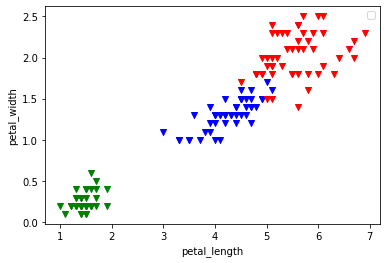

In [20]:
plt.xlabel("petal_length")
plt.ylabel("petal_width")

plt.scatter(df0["petal length (cm)"],df0["petal width (cm)"],color="green",marker="v")
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],color="blue",marker="v")
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],color="red",marker="v")
plt.legend()

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x=df.drop(["target","flower_names"],axis="columns")

In [23]:
y=df.target

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [26]:
print(len(x_train))
print(len(y_test))

120
30


In [27]:
from sklearn.svm import SVC

In [28]:
model=SVC()
model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
model.score(x_test,y_test)

1.0

In [31]:
model.predict(x_train)

array([1, 2, 0, 0, 2, 0, 0, 1, 1, 2, 2, 1, 0, 2, 2, 0, 1, 1, 2, 1, 1, 1,
       2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2,
       1, 0, 2, 1, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2, 0, 2,
       2, 0, 0, 0, 1, 2, 1, 2, 2, 1, 2, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0, 0, 2, 2, 0, 1, 0, 0, 0,
       2, 1, 1, 1, 2, 0, 0, 2, 0, 0])

In [32]:
## Tune parameters

In [35]:
#1 Regularization(c)

model_c=SVC()
model_c.fit(x_train,y_train)
model_c.score(x_test,y_test)

1.0

In [36]:
# Gamma

model_g=SVC(gamma=10)
model_g.fit(x_train,y_train)
model_g.score(x_test,y_test)

0.9666666666666667

In [38]:
# Kernel

model_linear_kernel=SVC(kernel="linear")
model_linear_kernel.fit(x_train,y_train)
model_linear_kernel.score(x_test,y_test)



1.0